In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor

%run year_build_predictor.ipynb

In [2]:
data_path = "..\\..\\..\\Kaggle\\data\\melb_data.csv"
data = pd.read_csv(data_path)
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [3]:
data.tail()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0
13579,Yarraville,6 Agnes St,4,h,1285000.0,SP,Village,26/08/2017,6.3,3013.0,...,1.0,1.0,362.0,112.0,1920.0,NaN,-37.81188,144.88449,Western Metropolitan,6543.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [5]:
missing_value = data.isna().sum()
missing_value = missing_value[missing_value > 0]

print(missing_value)

Car               62
BuildingArea    6450
YearBuilt       5375
CouncilArea     1369
dtype: int64


In [6]:
# YearBuilt Missing Value Handle

def missing_value_handler(data, columnName: str):
    known = data[data[columnName].notna()]
    unknown = data[data[columnName].isna()]

    num_cols = data.select_dtypes(include='number').columns.to_list()
    num_cols.remove(columnName)

    y = known[columnName]
    X = known[num_cols]

    model = RandomForestRegressor(random_state=1)
    model.fit(X,y)
    predicted = model.predict(unknown[num_cols])
    data.loc[data[columnName].isna(), columnName] = predicted
    return data

In [7]:
data = missing_value_handler(data, 'YearBuilt')
data = missing_value_handler(data, 'BuildingArea')
data = missing_value_handler(data, 'Car')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13580 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   13580 non-null  float64
 15  YearBuilt      13580 non-null  float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [9]:
missing_value = data.isna().sum()
missing_value = missing_value[missing_value > 0]

print(missing_value)

CouncilArea    1369
dtype: int64


In [10]:
less = missing_value[missing_value < ((30/100)*len(data))]
over = missing_value[missing_value >= ((30/100)*len(data))]

print(less,"\n")
print(over)

CouncilArea    1369
dtype: int64 

Series([], dtype: int64)


In [11]:
data = data.dropna(axis=0)
data.isna().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [15]:
# Misal df adalah DataFrame kamu
correlation = data.corr(numeric_only=True)
print(correlation['Price'].sort_values(ascending=False))


Price            1.000000
Rooms            0.510522
Bedroom2         0.487402
Bathroom         0.473933
BuildingArea     0.276180
Car              0.248628
Longtitude       0.201424
Postcode         0.118202
Landsize         0.038536
Propertycount   -0.037167
Distance        -0.146137
Lattitude       -0.207404
YearBuilt       -0.363553
Name: Price, dtype: float64


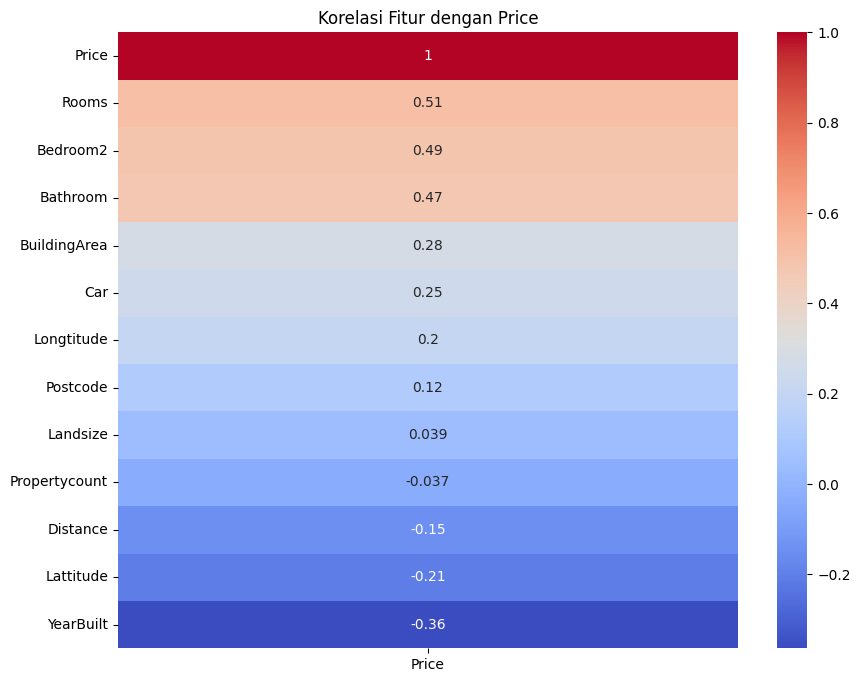

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(numeric_only=True)[['Price']].sort_values(by='Price', ascending=False), annot=True, cmap='coolwarm')
plt.title("Korelasi Fitur dengan Price")
plt.show()

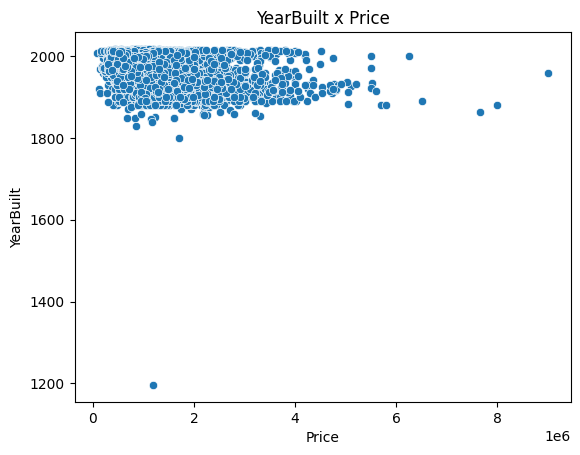

In [22]:
sns.scatterplot(data, x='Price', y='YearBuilt')
plt.title("YearBuilt x Price")
plt.xlabel('Price')
plt.ylabel('YearBuilt')
plt.show()